## Group No 297

## Group Member Names:
1. Chakradhar Kowsik 2020FC04737
2. Piyush Pawar 2021FC04728
3. Santhosh Mathai 2021FA04008

# 1. Problem Statement
 
Students are expected to identify a classification / regression problem of your choice. You have to detail the problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What kind of prediction (classification / regression) task are you performing?

ENSURE THAT YOU ARE USING NUMERICAL / CATEGORICAL DATA only.

DO NOT use images or textual data.

Score: 1 Mark in total (0.5 mark each)

#### 1. Problem Statement  
Developing a Deep learning model for a Bank Marketing Dataset, With the given data to find out whether the customer will subscribe to a Term Deposite by analysing a Bank Marketing Dataset.
#### 2. Problem Kind
 We are trying to classify customer into two groups either subscriber or not so we are trying to solve **classification** problem. To be more precise it is binary classification problem.

In [23]:
import warnings
warnings.filterwarnings('ignore')
import os.path
import time
from datetime import datetime,date,time
import requests
import seaborn as sn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from zipfile import ZipFile
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [3]:
class Util:
    def __init__(self):
        pass
    def downloadfile(self,data_zip_url,zip_filename):
        start_time = datetime.now()
        if not os.path.exists(zip_filename):
            print('Downloading the zip file from source {}.'.format(data_zip_url))
            zip_file = None
            try:
                resp=requests.get(data_zip_url,verify=False)
                if resp.status_code ==200:
                    print('Downloaded file successfully.')
                    print('Saving Zipfile {} to disk'.format(zip_filename))
                    zip_file = open(zip_filename,'wb')
                    zip_file.write(resp.content)
                else:
                    print('Downloading file failed!')
            except ex:
                print('Downloading file failed!')
            finally:
                if zip_file != None:
                    zip_file.close()
        else:
            print('File {} already downloaded'.format(zip_filename)) 
        end_time = datetime.now()
        print('Time taken to download and save is {}'.format(end_time- start_time))
                    
    def createfile(self,csv_filename):
        start_time = datetime.now()
        if not os.path.exists(csv_filename):
            csv_file = None
            zip_csv_file = None
            try:
                zip_csv_file = zip.open('bank-additional/'+csv_filename,'r')
                print('Creating file {}.'.format(csv_filename))        
                csv_file = open(csv_filename,'wb')
                csv_file.write(zip_csv_file.read())
            except ex:
                print('An error occurred while creating file {}'.format(csv_filename))
            finally:
                if csv_file != None:
                    csv_file.close()
                if zip_csv_file != None:
                    zip_csv_file.close()
        else: 
            print('File {} already exists in current directory'.format(csv_filename))
        end_time = datetime.now()
        print('Time taken to download and save is {}'.format(end_time- start_time))
util_obj= Util()

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Download the data directly



In [4]:
##---------Type the code below this line------------------##

In [5]:
data_zip_url='https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'
zip_filename = 'bank-additional.zip'
util_obj.downloadfile(data_zip_url,zip_filename)

Downloaded file successfully.
Saving Zipfile bank-additional.zip to disk
Time taken to download and save is 0:00:06.911831


In [10]:
zip= ZipFile(zip_filename)
print('List of file in zip {}'.format(zip_filename))
zip.printdir()

List of file in zip bank-additional.zip
File Name                                             Modified             Size
bank-additional/                               2014-03-26 11:28:00            0
bank-additional/.DS_Store                      2014-03-25 10:52:16         6148
__MACOSX/                                      2014-03-26 11:28:12            0
__MACOSX/bank-additional/                      2014-03-26 11:28:12            0
__MACOSX/bank-additional/._.DS_Store           2014-03-25 10:52:16           82
bank-additional/.Rhistory                      2014-03-25 16:27:14         3943
bank-additional/bank-additional-full.csv       2014-03-26 11:22:30      5834924
bank-additional/bank-additional-names.txt      2014-03-26 11:27:36         5458
bank-additional/bank-additional.csv            2014-03-26 11:23:34       583898
__MACOSX/._bank-additional                     2014-03-26 11:28:00          205


In [8]:
csv_filename = 'bank-additional-full.csv'
util_obj.createfile(csv_filename)

Creating file bank-additional-full.csv.
Time taken to download and save is 0:00:00.023161


## 2.2 Code for converting the above downloaded data into a form suitable for DL 

**Since in the data set it is indicated that None is replaced in data set with unknown, so while reading making it as None.**

In [7]:
##---------Type the code below this line------------------##

In [12]:
df = pd.read_csv(csv_filename,delimiter=";",index_col=None,na_values=['unknown'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2.3 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?

Score: 2 Mark

In [9]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.size)

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

# Bank client data:
   1. age (numeric)
   2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5. default: has credit in default? (categorical: "no","yes","unknown")
   6. housing: has housing loan? (categorical: "no","yes","unknown")
   7. loan: has personal loan? (categorical: "no","yes","unknown")

   8. contact: contact communication type (categorical: "cellular","telephone") 
   9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

  12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14. previous: number of contacts performed before this campaign and for this client (numeric)
  15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  16. emp.var.rate: employment variation rate. quarterly indicator (numeric)
  17. cons.price.idx: consumer price index. monthly indicator (numeric)     
  18. cons.conf.idx: consumer confidence index. monthly indicator (numeric)     
  19. euribor3m: euribor 3 month rate. daily indicator (numeric)
  20. nr.employed: number of employees. quarterly indicator (numeric)

# Output variable (desired target):
  21. y. has the client subscribed a term deposit? (binary: "yes","no")
  


# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


## 3.1 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies

IF ANY

In [11]:
null_cols=[]

for col in df.columns:
    #print(df[col].unique())
    null_count = df[col].isna().sum()
    if null_count>0:
        print(col, null_count)
        null_cols.append(col)

job 330
marital 80
education 1731
default 8597
housing 990
loan 990


In [ ]:
##---------Type the code below this line------------------##

In [ ]:
df.apply(pd.value_counts)

In [51]:
mdf= df.copy()
# We need to drop this duration column as this is identical to output parameter 
#i.e. duration>0 then subscribed but this will be noted 
#only when user calls so if he is saying greater than 0 we obviously know he has subscribed or not
mdf = mdf.drop(['duration'],axis=1)
mdf = mdf.dropna()
print('The {} % of original data set contains all information'.format(round(mdf.shape[0]/df.shape[0],4)*100))
print('The columns considered for next step {}'.format(mdf.columns))
len(mdf.columns)

The 74.02 % of original data set contains all information
The columns considered for next step Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')


20

In [ ]:
##---------Type the code below this line------------------##

## 3.2 Encode categorical data

In [ ]:
##---------Type the code below this line------------------##

## 3.3 Normalize the data

In [ ]:
##---------Type the code below this line------------------##

## 3.4 Feature Engineering 

if any

In [ ]:
##---------Type the code below this line------------------##

In [13]:
df = pd.read_csv(csv_filename,delimiter=";",index_col=None,na_values=['unknown'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<AxesSubplot:xlabel='y', ylabel='count'>

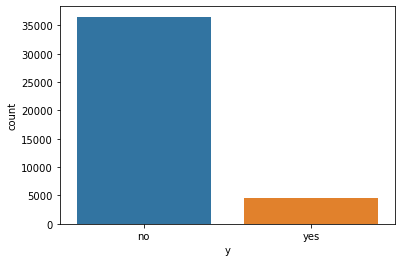

In [15]:
sn.countplot(x='y',data=df)

### We can see that the data is very skewed, so we duplicate the tuples corresponding to 'yes'

In [18]:
d1=df.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

<AxesSubplot:xlabel='y', ylabel='count'>

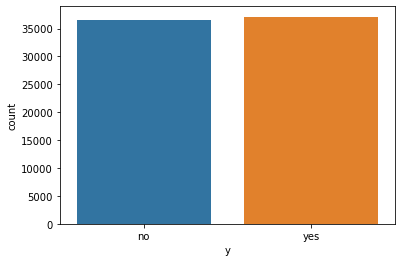

In [19]:
sn.countplot(x='y',data=data)

## Now the data looks much more balanced

## Aanalising the data distribution by plotting graphs for numerical fields 

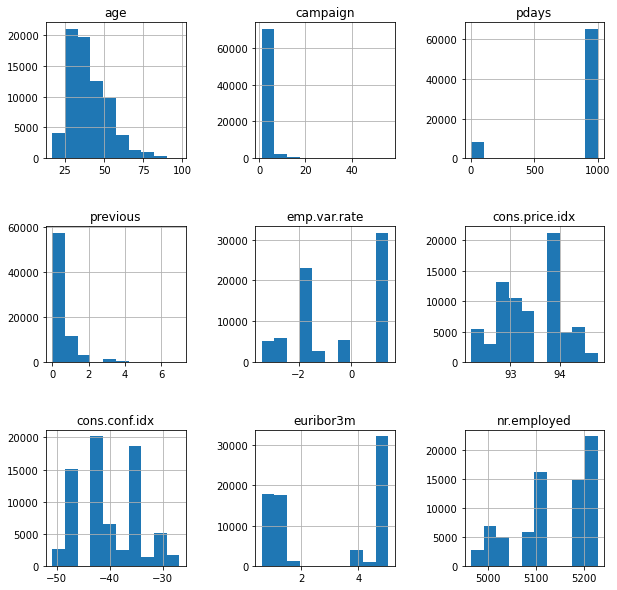

In [20]:
header = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

## We can see that the data is not evenly distributed, therefore we need to standardize

## Splitting 'pdays' feature into 2 features(i.e. 'pdays' and 'pdays2')

In [21]:
#creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
data['pdays2']=data.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
data['pdays']=data.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
data['pdays']=data['pdays'].astype(int)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## Label Encoding

In [27]:
le = preprocessing.LabelEncoder()
data.job = le.fit_transform(data.job)
data.marital = le.fit_transform(data.marital)
data.education = le.fit_transform(data.education)
data.default = le.fit_transform(data.default)
data.housing = le.fit_transform(data.housing)
data.loan = le.fit_transform(data.loan)
data.contact = le.fit_transform(data.contact)
data.month = le.fit_transform(data.month)
data.day_of_week = le.fit_transform(data.day_of_week)
data.poutcome = le.fit_transform(data.poutcome)
data.y = le.fit_transform(data.y)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,56,3,1,0,0,0,0,1,6,1,...,30,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,7,1,3,2,0,0,1,6,1,...,30,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,7,1,3,0,1,0,1,6,1,...,30,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,0,1,1,0,0,0,1,6,1,...,30,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,7,1,3,0,0,1,1,6,1,...,30,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0


In [28]:
data.shape

(73668, 22)

## 3.5 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.



In [ ]:
##---------Type the code below this line------------------##

## 3.6 Split the data into training set and testing set

In [ ]:
##---------Type the code below this line------------------##

## 3.7 Report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset

Score: 3 Marks

##---------Type the answer below this line------------------##

# 4. Deep Neural Network Architecture



## 4.1 Design the architecture that you will be using to solve the prediction problem identified.

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [ ]:
##---------Type the code below this line------------------##

## 4.2 Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Activation function used in each hidden layer
* Activation function used in the output layer
* Total number of trainable parameters 

Score: 4 Marks

##---------Type the answer below this line------------------##

# 5. Training the model


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations



In [ ]:
##---------Type the code below this line------------------##

## 5.2 Train the model

In [ ]:
##---------Type the code below this line------------------##

Justify your choice of optimizers and regulizations used and the hyperparameters tuned

Score: 4 Marks

##---------Type the answers below this line------------------##

# 6. Test the model

Score: 2 Marks

In [ ]:
##---------Type the code below this line------------------##

## 7. Conclusion 

Plot the training and validation loss
Report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.

Score 2 Marks

In [ ]:
##---------Type the code below this line------------------##

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

##NOTE
All Late Submissions will incur a penalty of -2 marks. So submit your assignments on time.

Good Luck